In [1]:
! python -m  pip install tensorflow jupyterlab-vim autocompletion

In [2]:
! python -m pip install opencv-python 

In [3]:
! python -m pip install keras

In [12]:
import tensorflow as tf
import keras
import numpy as np
import os
import imghdr
import cv2
import matplotlib.pyplot as plt

In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
image_exts = ['jpeg', 'jpg','bmp','png']
data_dir = '/Windows/Drive_2/work_2/image-classif-with-cnn/data'

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_dir,image)
        try:
            with open(image_path,'r') as file:
                img = cv2.imread(image_path)
                ext = imghdr.what(image_path)      
            if ext not in image_exts:
                # print('Image not in .ext list {}'.format(image_path))
                os.remove(image_path)
        except OSError as e:
             # print('Issue with image {}'.format(image_path))
            pass

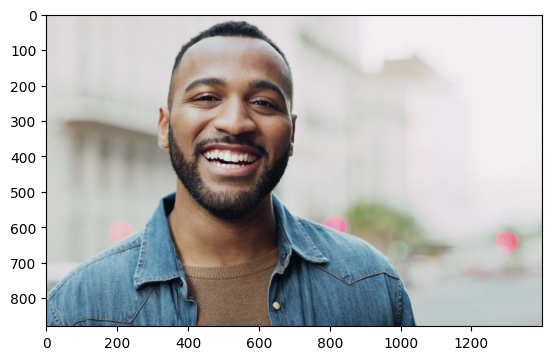

In [25]:
#plotting for fun

sample_img_path = os.path.join(data_dir,'happy' )
img = os.listdir(sample_img_path)
final_img = cv2.imread(os.path.join(data_dir,'happy', img[0]))
plt.imshow(cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB))


In [27]:
keras.utils.image_dataset_from_directory(data_dir,batch_size=8, image_size=(128,128))

Found 246 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
# loading the dataset

# this utility takes all the images from the specified directories
# does all the pre processing out of the box , and makes lives easy ig
data = keras.utils.image_dataset_from_directory(data_dir)

# converting to numpy iterator to access using our data pipelines
data_iterator = data.as_numpy_iterator()
batch =data_iterator.next()

Found 246 files belonging to 2 classes.


In [51]:
batch[0].shape

(32, 256, 256, 3)

In [43]:
batch[1]
# giving the list labels applied to the images 
# in this case 
# 0 = happy
# 1 => sad

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

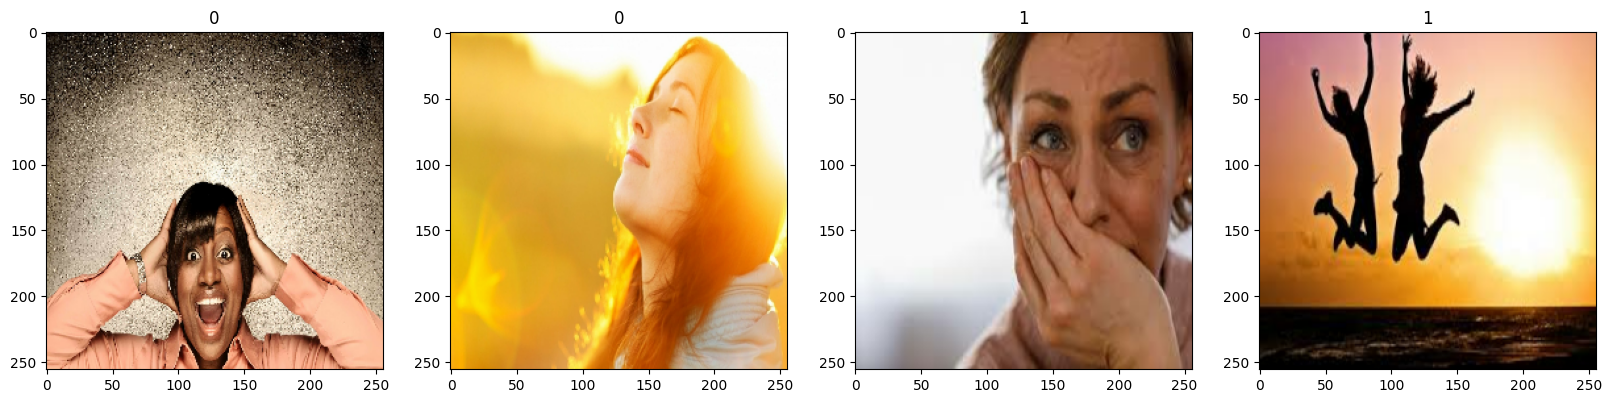

In [49]:
# plotting for batch 
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][6:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# preprocessing the data

In [54]:
# Note:
# batch[0] => has the images
# batch[1] => has the labels

# as the images are in RGB format

batch[0].max() # should give 255
batch[0].min() # should give 0 

0.0

In [56]:
# scaling them to 0 to 1 ( by dividing with 255 )

scaled = batch[0] / 255 
scaled.max() # o/p should be 1.0

1.0

In [ ]:
# Note :
# we are trying implement all these with the help of pipeline , 
# So scaling things down like this won't be optimal
# We have to do it while loading the data itself